(array([5., 3.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


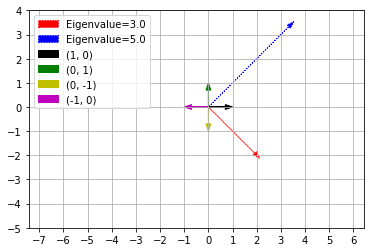

In [74]:
import numpy as np
A = np.array([[4,1],[1,4]])
A_eigens = np.linalg.eig(A)
print(A_eigens)
%matplotlib inline
import matplotlib.pyplot as plt
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], 
                     vector2d[0], vector2d[1],
                     head_width=0.2, head_length=0.3, 
                     length_includes_head=True,**options)

vector_original_1 = np.array([[1],[0]])
vector_original_2 = np.array([[0],[1]])
vector_original_3 = np.array([[0],[-1]])
vector_original_4 = np.array([[-1],[0]])

vector_transformed_1 = np.matmul(A,vector_original_1).T[0]
vector_transformed_2 = np.matmul(A,vector_original_2).T[0]
vector_transformed_3 = np.matmul(A,vector_original_3).T[0]
vector_transformed_4 = A.dot(vector_original_4).T[0]

plot_vector2d(A_eigens[1][0]*A_eigens[0][1], color="r", label=f"Eigenvalue={A_eigens[0][1]}", linestyle="dotted")
plot_vector2d(A_eigens[1][1]*A_eigens[0][0], color="b", label=f"Eigenvalue={A_eigens[0][0]}", linestyle="dotted")

plot_vector2d(vector_original_1.T[0], color="k", label="(1, 0)")
plot_vector2d(vector_original_2.T[0], color="g", label="(0, 1)")
plot_vector2d(vector_original_3.T[0], color="y", label="(0, -1)")
plot_vector2d(vector_original_4.T[0], color="m", label="(-1, 0)")

# plot_vector2d(vector_transformed_1, color="k", label="(1, 0) transformed")
# plot_vector2d(vector_transformed_2, color="g", label="(0, 1) transformed")
# plot_vector2d(vector_transformed_3, color="y", label="(0, -1) transformed")
# plot_vector2d(vector_transformed_4, color="m", label="(-1, 0) transformed")
# plt.axis([-10, 10, -10, 10])
plt.axis('equal')
x_ticks = np.arange(-8, 8, 1)
y_ticks = np.arange(-5, 5, 1)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
# plt.grid(axis='x', linewidth=1, linestyle='--', color='0.75')
# plt.grid(axis='y', linewidth=1, linestyle='--', color='0.75')
plt.legend()
plt.grid()
# plt.show()
plt.savefig('Fig_00.png', dpi=300)

In [48]:
import numpy as np
A = np.array([[1,0,0],[0,0,0],[0,0,0]])
A_eigens = np.linalg.eig(A)
print(A_eigens)

(array([1., 0., 0.]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]))


In [71]:
import numpy as np
A = np.array([[4,1],[1,4]])
A_eigens = np.linalg.eig(A)
print(A_eigens[1][0])
print(A.dot(A_eigens[1][0]))
print(A_eigens[1][1])
print(A.dot(A_eigens[1][1]))

[ 0.70710678 -0.70710678]
[ 2.12132034 -2.12132034]
[0.70710678 0.70710678]
[3.53553391 3.53553391]


### https://github.com/HowDoIUseThis/GershgorinCircles/blob/master/EAprox.py

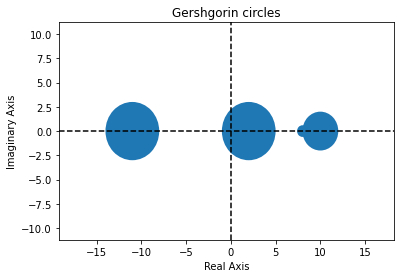

In [52]:
import numpy as np
from math import fabs
import matplotlib.pyplot as plt
from numpy import linalg as LA

def GregsCircles(matrix):
    if isSquare(matrix) != True:
        print('Your input matrix is not square!')
        return []
    circles = []
    for x in range(0,len(matrix)):
        radius = 0
        piv = matrix[x][x]
        for y in range(0,len(matrix)):
            if x != y:
                radius += fabs(matrix[x][y])
        circles.append([piv,radius])
    return circles

def plotCircles(circles):
    index, radi = zip(*circles)
    Xupper = max(index) + np.std(index)
    Xlower = min(index) - np.std(index)
    Ylimit = max(radi) + np.std(index)
    fig, ax = plt.subplots() 
    ax = plt.gca()
    ax.cla()
    ax.set_xlim((Xlower,Xupper))
    ax.set_ylim((-Ylimit,Ylimit))
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title('Gershgorin circles')
    for x in range(0,len(circles)):
        circ = plt.Circle((index[x],0), radius = radi[x])
        ax.add_artist(circ)
    ax.plot([Xlower,Xupper],[0,0],'k--')
    ax.plot([0,0],[-Ylimit,Ylimit],'k--')
    fig.savefig('plotcircles.png')
    
def isSquare(m):
    cols = len(m)
    for row in m:
        if len(row) != cols:
            return False
    return True

def main():
    test = np.array([[10,-1,0,1],[0.2,8,0.2,0.2],[1,1,2,1],[-1,-1,-1,-11]])
    temp = GregsCircles(test)
    plotCircles(temp)

if __name__ == '__main__':
    main()

### https://blog.csdn.net/jclian91/article/details/80213733

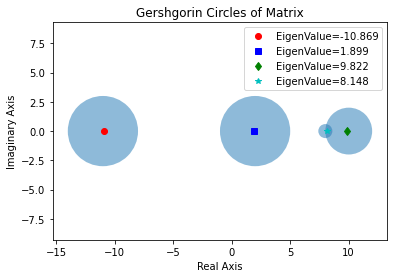

In [66]:
# Plotting Gershgorin Circles for any square matrix
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

def linestyle_generator(type_or_color, color_num):
    from itertools import cycle
    bgrcmyk = ['or', 'sb', 'dg', '*c', '^m', 'hy', 'Vk']
    sddd = ["-", "--", "-.", ":"]  # "solid", "dashed",, "dashdot" "dotted"
    style_list = []
    if type_or_color.lower() == 'type':
        cycle_list = cycle(sddd)
    elif type_or_color.lower() == 'color':
        cycle_list = cycle(bgrcmyk)
    else:
        warnings.warn('Only "type" or "color" is allowed here')  # raise?

    for i in range(color_num):
        style_list.append(next(cycle_list))
    return style_list
# example matrix, each entity can be complex number
# A = np.array([[5, 0, 0, -1],
#               [1, 0, -1, 0],
#               [-1.5, 1, -2, 1],
#               [-1, 1, 1, -3j]
#              ],dtype='complex')
A = np.array([[10,-1,0,1],[0.2,8,0.2,0.2],[1,1,2,1],[-1,-1,-1,-11]])
A_eigens = np.linalg.eig(A)[0]
color_list = linestyle_generator('color', len(A_eigens))
# begin plotting figure
fig, ax = plt.subplots() 
# Circle: |A[i,i]-z| <= sum(|A[i,j]| for j in range(n) and j != i)
for i in range(A.shape[0]):
    real = A[i,i].real    # each complex's real part
    imag = A[i,i].imag    # each complex's image part

    # calculate the radius of each circle
    radius = -sqrt(A[i,i].real**2+A[i,i].imag**2)
    for j in range(A.shape[0]):
        radius += sqrt(A[i,j].real**2+A[i,j].imag**2)

    # add the circle to the  figure and plot the center of the circle
    cir = Circle(xy = (real,imag), radius=radius, alpha=0.5, fill='yellow')
    ax.add_patch(cir)
    x, y = A_eigens[i], imag
    ax.plot(x, y, color_list[i], label=f'EigenValue={x:.3f}')
plt.legend()
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')    
ax.axis('equal')
# title
plt.title("Gershgorin Circles of Matrix")

# show the figure which can be used for analyse eigenvalues of the matrix
plt.savefig("Fig_GerschgorinCircles.png")

### https://blog.csdn.net/hqh131360239/article/details/79061535?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.add_param_isCf&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.add_param_isCf

In [90]:
import numpy as np
A = np.random.randint(-10, 10, size=(2, 3))
m, n = A.shape

print(f'The random integer matrix is {A}, with dimension of {m} by {n}')
#默认参数ord=None，axis=None，keepdims=False
print("默认参数(矩阵整体元素平方和开根号，不保留矩阵二维特性)：",np.linalg.norm(A))
print("矩阵整体元素平方和开根号，保留矩阵二维特性：",np.linalg.norm(A,keepdims=True))
 
print("矩阵每个行向量求向量的2范数：",np.linalg.norm(A,axis=1,keepdims=True))
print("矩阵每个列向量求向量的2范数：",np.linalg.norm(A,axis=0,keepdims=True))
 
print("矩阵1范数：",np.linalg.norm(A,ord=1,keepdims=True))
print("矩阵2范数：",np.linalg.norm(A,ord=2,keepdims=True))
print("矩阵∞范数：",np.linalg.norm(A,ord=np.inf,keepdims=True))
 
print("矩阵每个行向量求向量的1范数：",np.linalg.norm(A,ord=1,axis=1,keepdims=True))

The random integer matrix is [[-6  3  4]
 [-8  4  7]], with dimension of 2 by 3
默认参数(矩阵整体元素平方和开根号，不保留矩阵二维特性)： 13.784048752090222
矩阵整体元素平方和开根号，保留矩阵二维特性： [[13.78404875]]
矩阵每个行向量求向量的2范数： [[ 7.81024968]
 [11.35781669]]
矩阵每个列向量求向量的2范数： [[10.          5.          8.06225775]]
矩阵1范数： [[14.]]
矩阵2范数： [[13.76008035]]
矩阵∞范数： [[19.]]
矩阵每个行向量求向量的1范数： [[13.]
 [19.]]


In [88]:
import numpy as np
A = np.array([[1,1],[0,1]])
A_eigens = np.linalg.eig(A)
print(A.dot(A).dot(A).dot(A))

[[1 4]
 [0 1]]
